#0. 데이터 불러오기

In [ ]:
# 데이터 불러오기

import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Section 1_project_vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 컬럼이름 변경

df = df.drop('Unnamed: 0', axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#1. 데이터 탐색 & 전처리

##1]. 결측치 처리

In [ ]:
#. 결측치 개수 조사

pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,2


In [ ]:
# 결측치가 있는 지점의 행 정보 보기

df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [ ]:
df[df['Name'] == 'Rock Band']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0,0.2
10776,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0,0.22
12858,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0,0.35


In [ ]:
df[df['Genre'].isnull()]
# Genre가 null이 아닌 정보 추출 : df[~df['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000,NaN,Ubisoft,0.07,0.02,0,0


In [ ]:
df[df['Publisher'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


In [ ]:
df[df['Other_Sales'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7596,"B's-LOG Party??,PSP""",2010,Adventure,Idea Factory,0,0,0.04,0,NaN
16191,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0,0.08,0,NaN


In [ ]:
df.dtypes

Name           object
Platform       object
Year           object
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [ ]:
# 결측치와 프로젝트 dataset과 연관된 data를 조사한 후, 결측값이 있는 행의 모든 항목을 제거하기로 함.

# >> 가정 1 : drop값이 있다는 것은 상대적으로 덜 알려진 게임이라고 가정 >> 상대적으로 덜 알려진 게임을 drop하는 것이 게임의 트랜드를 
# 파악하는 데 있어 큰 지장을 주지 않는다고 가정.
# >> 가정 2 : drop 후에도 여전히 많은 수의 게임이 남아있기 때문에(drop 전 게임 수: 16598개, drop후 게임 수: 16239개)
# 게임시장의 미래를 예측하는 데에 지장이 없다고 가정

df = df.dropna(axis=0, how='any')
df = df.reset_index(drop = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16234,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16235,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16236,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16237,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 결측치 제거 여부 확인

pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


##2]. 숫자 데이터 전처리

In [ ]:
#1. Year 데이터 전처리

# >> year이 4자리, 2자리로 되어있는 경우 이외에는 전부 drop
# >> year이 4자리로 되어있다면 데이터 형태만 변환시켜 사용
# >> year이 2자리인 경우 숫자에 따라 앞에 '20' 또는 '19'를 붙혀 년도를 사용


df['Year'].unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', '9', '97', '1995',
       '1993', '2012', '1987', '1982', '11', '1994', '1990', '15', '1992',
       '1991', '1983', '1988', '1981', '3', '1989', '96', '6', '8',
       '1986', '1', '5', '4', '10', '98', '7', '16', '86', '14', '95',
       '2017', '1980', '2020', '2', '13', '0', '12', '94'], dtype=object)

In [ ]:
df['Year'].values

array(['2008', '2009', '2010', ..., '2015', '2013', '1996'], dtype=object)

In [ ]:
a = []

for i in df['Year'].values:
  if len(i) == 4:
    a.append(i)
  elif len(i) == 2:
    if int(i) >= 21:
      i = '19' + i
    else:
      i = '20' + i
    a.append(i)
  else:
    a.append(np.NaN)

df['Year'] = a

In [ ]:
df = df.dropna(axis=0, how='any')
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
def to_int(string):
  return int(string)

df['Year'] = df['Year'].apply(to_int)
df['Year'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [ ]:
#2. Sales 부문의 데이터 전처리

# >> 소수점만 포함된 경우 : * 1000000(백만)하기(1이 1000000[백만]이기 때문에)
# >> 문자 K또는 M이 포함된 경우 : 문자를 떼고 실수타입으로 변환시킨 후 천 또는 백만을 곱함
# >> ref1 : https://www.kaggle.com/code/gabriellonghini/data-visualization-with-pandas-games-sales/notebook
# >> ref2 : https://datascience.fm/video-game-sales-analysis/


for j in range(5, len(df.columns)):
  a = []

  for i in df[df.columns[j]].values:
    if i[-1] == 'K':
      i = float(i.replace('K', ''))
      a.append(i * 1000)
    elif i[-1] == 'M':
      i = float(i.replace('M', ''))
      a.append(i * 1000000)
    else:
      a.append(float(i) * 1000000)

  df[df.columns[j]] = a

# Sales 부문 전처리의 다른 방법 :

# def to_flt(string):
#   return float(string) * 1000000

# for i in range(6, len(df.columns)):
#   df[df.columns[i]][~((df[df.columns[i]].str.contains('K')) | (df[df.columns[i]].str.contains('M')))] = df[df.columns[i]][~((df[df.columns[i]].str.contains('K')) | (df[df.columns[i]].str.contains('M')))].apply(to_flt)
#   df[df.columns[i]] = df[df.columns[i]].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)

# K 또는 M이 어디에 위치해 있어도 작동이 되는 장점이 있으나 실행시간[약 12초]이 다소 길다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# dtypes을 확인했을 때, float64가 나온다면 컬럼의 모든 셀들이 실수로 잘 변환 된 것임.
# 하나의 셀이라도 object일 시 그 컬럼의 dtypes는 object가 나옴.
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df = df.reset_index(drop = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16181,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16182,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16183,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16184,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


#3. 데이터 시각화

###1]. 지역에 따라서 선호하는 게임 장르

In [ ]:
# 한글글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

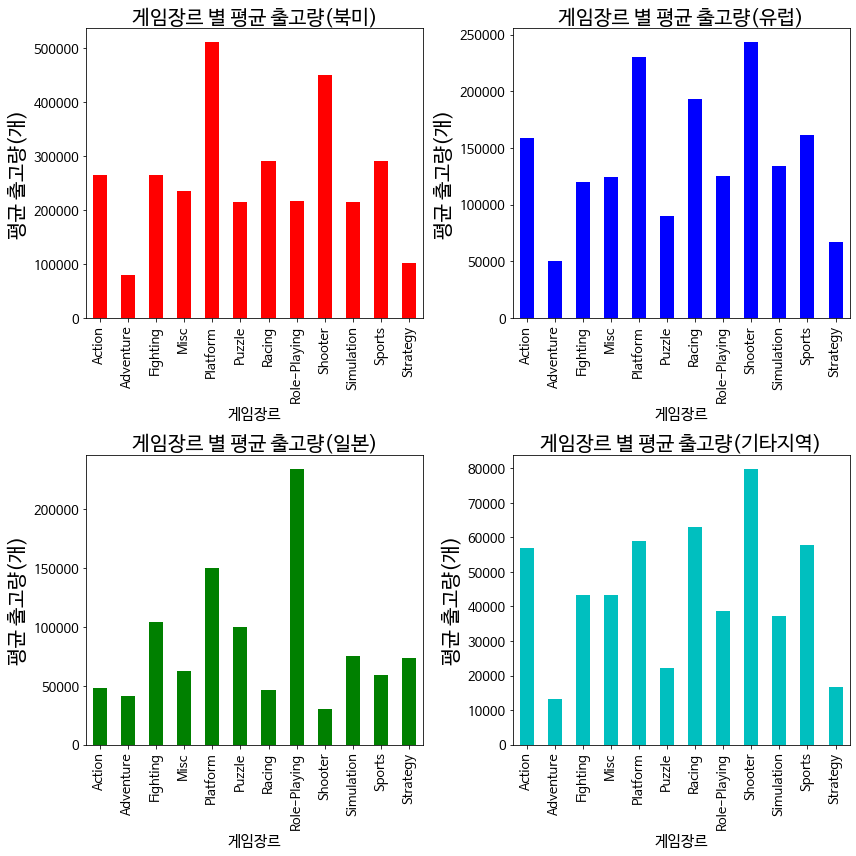

In [ ]:
# 지역에 따른 게임 장르 별 출고량

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

plt.subplot(221)
a = df.groupby('Genre').NA_Sales.mean()
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r')
plt.title('게임장르 별 평균 출고량(북미)', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(222)
b = df.groupby('Genre').EU_Sales.mean()
b.plot(x = b.index, y = b.values, kind = 'bar', color = 'b')
plt.title('게임장르 별 평균 출고량(유럽)', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(223)
c = df.groupby('Genre').JP_Sales.mean()
c.plot(x = c.index, y = c.values, kind = 'bar', color = 'g');
plt.title('게임장르 별 평균 출고량(일본)', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(224)
d = df.groupby('Genre').Other_Sales.mean()
d.plot(x = d.index, y = d.values, kind = 'bar', color = 'c');
plt.title('게임장르 별 평균 출고량(기타지역)', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.tight_layout()

###2]. 연도별 게임의 트렌드


In [ ]:
# 새로운 피쳐 'Total_Sales'생성

df['Total_Sales'] = df.loc[:, 'NA_Sales':'Other_Sales'].sum(axis = 1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [ ]:
df_8090 = df[((df['Year'] >= 1980) & (df['Year'] <= 1990))]
df_8090 = df_8090.reset_index(drop = True)
df_8090

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Beamrider,2600,1984,Racing,Activision,260000.0,10000.0,0.0,0.0,270000.0
1,Bomberman,NES,1985,Puzzle,Hudson Soft,180000.0,0.0,850000.0,0.0,1030000.0
2,Wrecking Crew,NES,1985,Platform,Nintendo,0.0,0.0,510000.0,0.0,510000.0
3,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987,Role-Playing,Namco Bandai Games,0.0,0.0,1250000.0,0.0,1250000.0
4,Mountain King,2600,1982,Action,CBS Electronics,290000.0,20000.0,0.0,0.0,310000.0
...,...,...,...,...,...,...,...,...,...,...
215,Frogs And Flies,2600,1981,Action,Mattel Interactive,330000.0,20000.0,0.0,0.0,350000.0
216,Polaris,2600,1982,Action,Tigervision,260000.0,20000.0,0.0,0.0,280000.0
217,Pitfall II: Lost Caverns,2600,1983,Platform,Activision,1220000.0,70000.0,0.0,20000.0,1310000.0
218,Mega Man 2,NES,1988,Action,Capcom,930000.0,150000.0,420000.0,10000.0,1510000.0


In [ ]:
df_9000 = df[((df['Year'] >= 1991) & (df['Year'] <= 2000))]
df_9000 = df_9000.reset_index(drop = True)
df_9000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Ghost in the Shell,PS,1997,Simulation,Sony Computer Entertainment,60000.0,40000.0,0.0,10000.0,110000.0
1,Starwinder: The Ultimate Space Race,PS,1996,Racing,Mindscape,30000.0,20000.0,0.0,0.0,50000.0
2,McGrath Vs. Pastrana Freestyle Motocross,PS,2000,Racing,Acclaim Entertainment,140000.0,100000.0,0.0,20000.0,260000.0
3,Vagrant Story,PS,2000,Role-Playing,Crave Entertainment,300000.0,200000.0,300000.0,60000.0,860000.0
4,Nippon Daihyou Team no Kantoku ni Narou! Sekai...,SAT,1998,Sports,Sega,0.0,0.0,120000.0,0.0,120000.0
...,...,...,...,...,...,...,...,...,...,...
2088,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320000.0,220000.0,0.0,40000.0,580000.0
2089,Shanghai: True Valor,PS,1998,Puzzle,Activision,10000.0,10000.0,0.0,0.0,20000.0
2090,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,80000.0,10000.0,90000.0
2091,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,120000.0,10000.0,130000.0


In [ ]:
df_0010 = df[((df['Year'] >= 2001) & (df['Year'] <= 2010))]
df_0010 = df_0010.reset_index(drop = True)
df_0010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
10001,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0
10002,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4180000.0,260000.0,10000.0,80000.0,4530000.0
10003,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,20000.0,0.0,20000.0
10004,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0


In [ ]:
df_1020 = df[((df['Year'] >= 2011) & (df['Year'] <= 2020))]
df_1020 = df_1020.reset_index(drop = True)
df_1020

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
1,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0
2,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.0,0.0,30000.0,0.0,30000.0
3,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,20000.0,0.0,30000.0,0.0,50000.0
4,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.0,10000.0,0.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
3862,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.0,30000.0,0.0,0.0,30000.0
3863,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0
3864,MindJack,PS3,2011,Shooter,Square Enix,70000.0,80000.0,0.0,30000.0,180000.0
3865,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0


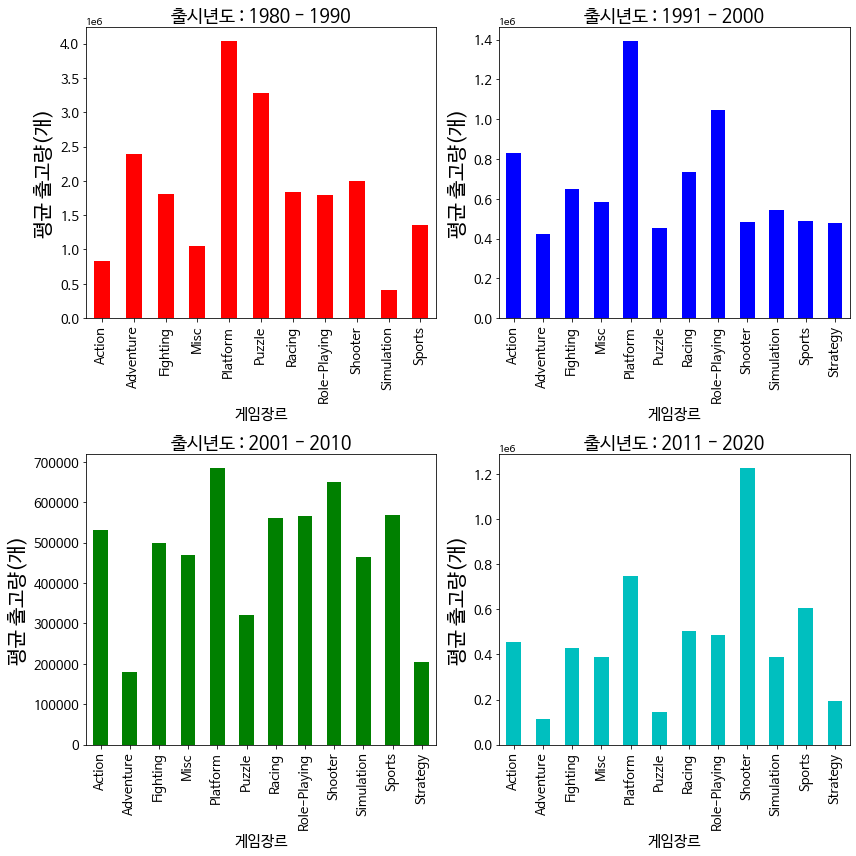

In [ ]:
# 연도별 게임의 트렌드

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

plt.subplot(221)
a = df_8090.groupby('Genre').Total_Sales.mean()
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r');
plt.title('출시년도 : 1980 - 1990', fontsize = 18)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(222)
b = df_9000.groupby('Genre').Total_Sales.mean()
b.plot(x = b.index, y = b.values, kind = 'bar', color = 'b');
plt.title('출시년도 : 1991 - 2000', fontsize = 18)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(223)
c = df_0010.groupby('Genre').Total_Sales.mean()
c.plot(x = c.index, y = c.values, kind = 'bar', color = 'g');
plt.title('출시년도 : 2001 - 2010', fontsize = 18)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(224)
d = df_1020.groupby('Genre').Total_Sales.mean()
d.plot(x = d.index, y = d.values, kind = 'bar', color = 'c');
plt.title('출시년도 : 2011 - 2020', fontsize = 18)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.tight_layout()

###3]. 출고량이 높은 게임에 대한 분석 및 시각화

In [ ]:
df_top10 = df.sort_values('Total_Sales', ascending = False).head(10)
df_top10 = df_top10.reset_index(drop = True)
df_top10.index = df_top10['Name']
df_top10 = df_top10.drop('Name', axis = 1) # 열 drop
df_top10

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0


In [ ]:
df_top10_NA = df.sort_values('NA_Sales', ascending = False).head(10)
df_top10_NA = df_top10_NA.reset_index(drop = True)
df_top10_NA.index = df_top10_NA['Name']
df_top10_NA = df_top10_NA.drop('Name', axis = 1) # 열 drop
df_top10_NA

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0
Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0


In [ ]:
df_top10_EU = df.sort_values('EU_Sales', ascending = False).head(10)
df_top10_EU = df_top10_EU.reset_index(drop = True)
df_top10_EU.index = df_top10_EU['Name']
df_top10_EU = df_top10_EU.drop('Name', axis = 1) # 열 drop
df_top10_EU

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Nintendogs,DS,2005,Simulation,Nintendo,9070000.0,11000000.0,1930000.0,2750000.0,24750000.0
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750000.0,9260000.0,4160000.0,2050000.0,20220000.0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
df_top10_JP = df.sort_values('JP_Sales', ascending = False).head(10)
df_top10_JP = df_top10_JP.reset_index(drop = True)
df_top10_JP.index = df_top10_JP['Name']
df_top10_JP = df_top10_JP.drop('Name', axis = 1) # 열 drop
df_top10_JP

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9000000.0,6180000.0,7200000.0,710000.0,23090000.0
Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6420000.0,4520000.0,6040000.0,1370000.0,18350000.0
Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570000.0,3280000.0,5650000.0,820000.0,15320000.0
Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6060000.0,3900000.0,5380000.0,500000.0,15840000.0
Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2550000.0,3520000.0,5330000.0,880000.0,12280000.0
Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3440000.0,5360000.0,5320000.0,1180000.0,15300000.0


In [ ]:
df_top10_Other = df.sort_values('Other_Sales', ascending = False).head(10)
df_top10_Other = df_top10_Other.reset_index(drop = True)
df_top10_Other.index = df_top10_Other['Name']
df_top10_Other = df_top10_Other.drop('Name', axis = 1) # 열 drop
df_top10_Other

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10570000.0,20810000.0
Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3010000.0,10000.0,1100000.0,7530000.0,11650000.0
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,50000.0,0.0,640000.0,2930000.0,3620000.0
New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0


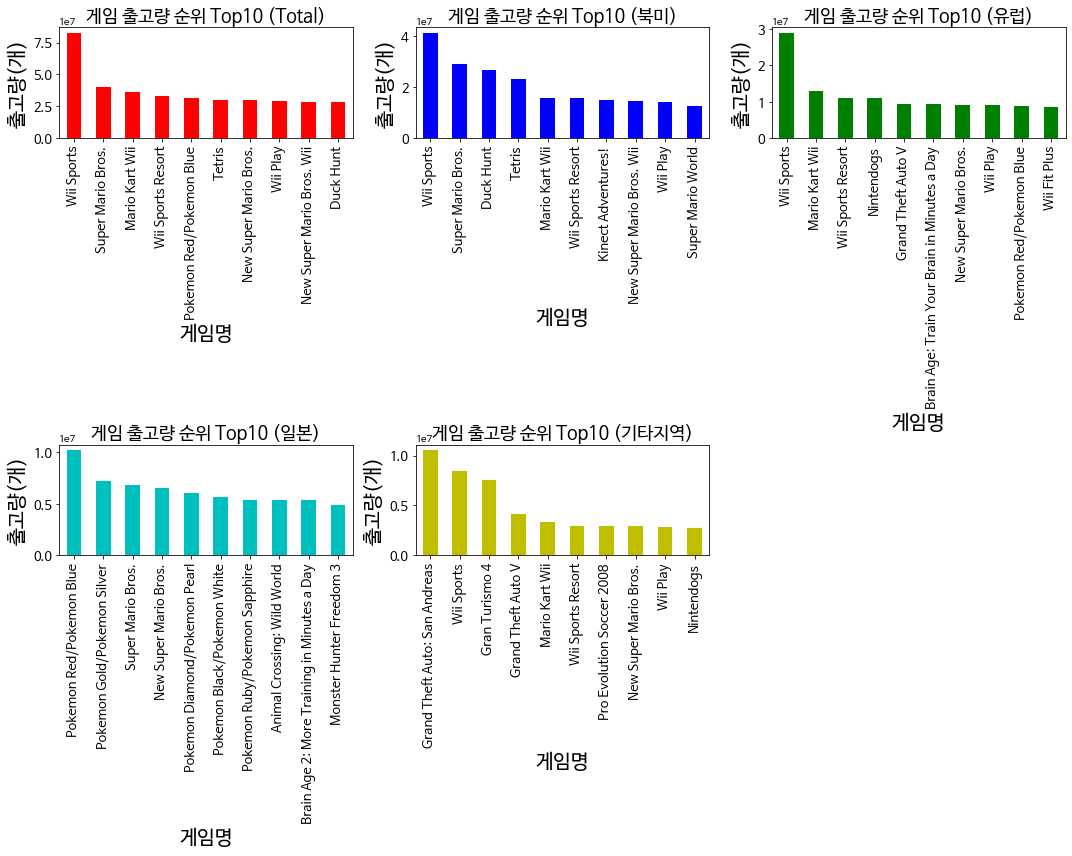

In [ ]:
# total

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 12))
# 출고량이 높은 게임에 대한 분석 및 시각화
plt.subplot(231)
a = df_top10['Total_Sales']
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r');
plt.title('게임 출고량 순위 Top10 (Total)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(232)
b = df_top10_NA['NA_Sales']
b.plot(x = b.index, y = b.values, kind = 'bar', color = 'b');
plt.title('게임 출고량 순위 Top10 (북미)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(233)
c = df_top10_EU['EU_Sales']
c.plot(x = c.index, y = c.values, kind = 'bar', color = 'g');
plt.title('게임 출고량 순위 Top10 (유럽)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(234)
d = df_top10_JP['JP_Sales']
d.plot(x = d.index, y = d.values, kind = 'bar', color = 'c');
plt.title('게임 출고량 순위 Top10 (일본)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.subplot(235)
e = df_top10_Other['Other_Sales']
e.plot(x = e.index, y = e.values, kind = 'bar', color = 'y');
plt.title('게임 출고량 순위 Top10 (기타지역)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(개)', fontsize = 20);
plt.tick_params(labelsize = 13)

plt.tight_layout()
# c = df_top10['Total_Sales'].plot.bar();
# c

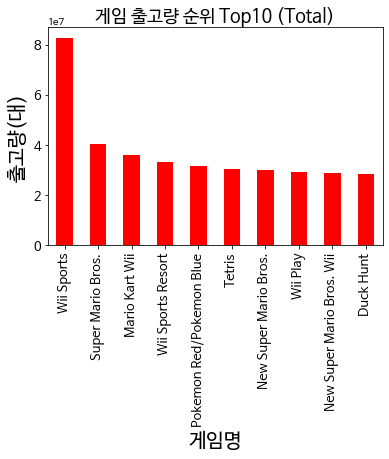

In [ ]:
a.plot(x = d.index, y = d.values, kind = 'bar', color = 'r');
plt.title('게임 출고량 순위 Top10 (Total)', fontsize = 18)
plt.xlabel('게임명', fontsize = 20);
plt.ylabel('출고량(대)', fontsize = 20);
plt.tick_params(labelsize = 13)

##4]. 출시년도가 2015년 이후인 게임들의 지역별 게임 트랜드

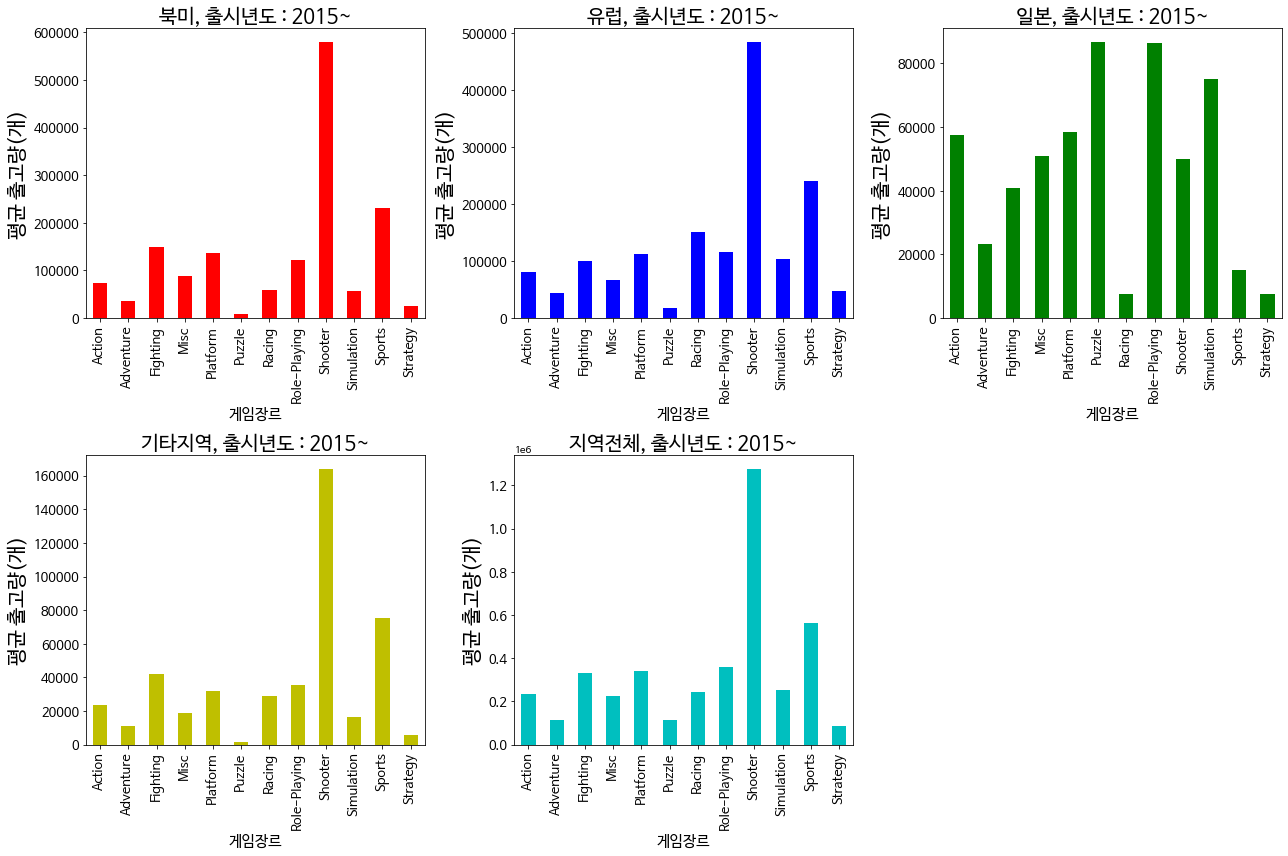

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))

plt.subplot(231)

a = df[(df['Year'] >= 2015)].groupby('Genre').NA_Sales.mean()
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r')
plt.title('북미, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(232)
b = df[(df['Year'] >= 2015)].groupby('Genre').EU_Sales.mean()
b.plot(x = b.index, y = b.values, kind = 'bar', color = 'b')
plt.title('유럽, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(233)
c = df[(df['Year'] >= 2015)].groupby('Genre').JP_Sales.mean()
c.plot(x = c.index, y = c.values, kind = 'bar', color = 'g')
plt.title('일본, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(234)
d = df[(df['Year'] >= 2015)].groupby('Genre').Other_Sales.mean()
d.plot(x = d.index, y = d.values, kind = 'bar', color = 'y')
plt.title('기타지역, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(235)
e = df[(df['Year'] >= 2015)].groupby('Genre').Total_Sales.mean()
e.plot(x = e.index, y = e.values, kind = 'bar', color = 'c')
plt.title('지역전체, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.tight_layout()

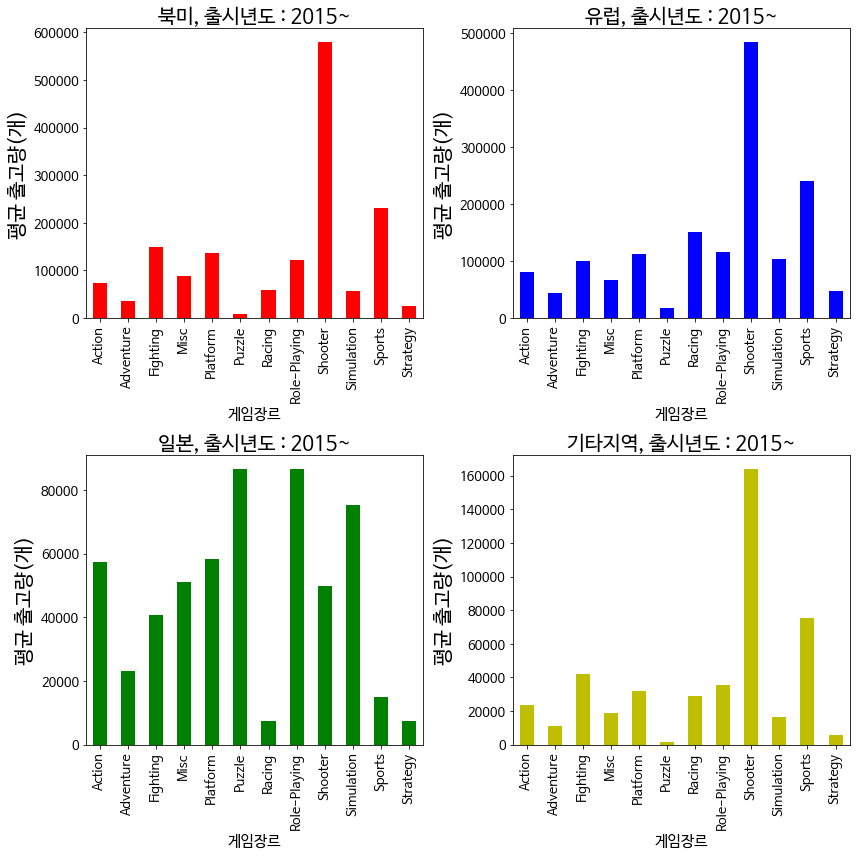

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

plt.subplot(221)

a = df[(df['Year'] >= 2015)].groupby('Genre').NA_Sales.mean()
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r')
plt.title('북미, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(222)
b = df[(df['Year'] >= 2015)].groupby('Genre').EU_Sales.mean()
b.plot(x = b.index, y = b.values, kind = 'bar', color = 'b')
plt.title('유럽, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(223)
c = df[(df['Year'] >= 2015)].groupby('Genre').JP_Sales.mean()
c.plot(x = c.index, y = c.values, kind = 'bar', color = 'g')
plt.title('일본, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

plt.subplot(224)
d = df[(df['Year'] >= 2015)].groupby('Genre').Other_Sales.mean()
d.plot(x = d.index, y = d.values, kind = 'bar', color = 'y')
plt.title('기타지역, 출시년도 : 2015~', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15)
plt.ylabel('평균 출고량(개)', fontsize = 20)
plt.tick_params(labelsize = 13);

# plt.subplot(235)
# e = df[(df['Year'] >= 2015)].groupby('Genre').Total_Sales.mean()
# e.plot(x = e.index, y = e.values, kind = 'bar', color = 'c')
# plt.title('지역전체, 출시년도 : 2015~', fontsize = 20)
# plt.xlabel('게임장르', fontsize = 15)
# plt.ylabel('평균 출고량(개)', fontsize = 20)
# plt.tick_params(labelsize = 13);

plt.tight_layout()

In [ ]:
# 2015년 이후의 출시년도를 가진 장르 별 게임의 수

df[(df['Year'] >= 2015)].groupby('Genre').EU_Sales.count()



Genre
Action          372
Adventure        86
Fighting         35
Misc             57
Platform         24
Puzzle            6
Racing           39
Role-Playing    120
Shooter          66
Simulation       25
Sports          100
Strategy         27
Name: EU_Sales, dtype: int64

In [ ]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

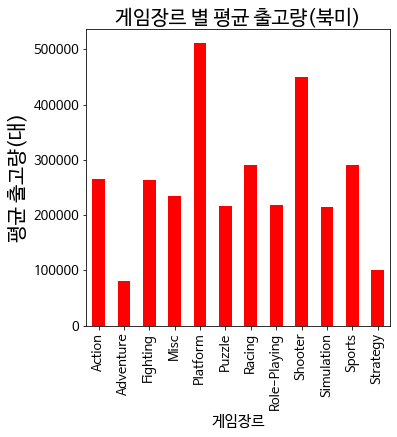

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

plt.subplot(221)
a = df.groupby('Genre').NA_Sales.mean()
a.plot(x = a.index, y = a.values, kind = 'bar', color = 'r')
plt.title('게임장르 별 평균 출고량(북미)', fontsize = 20)
plt.xlabel('게임장르', fontsize = 15);
plt.ylabel('평균 출고량(대)', fontsize = 20);
plt.tick_params(labelsize = 13)